In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

csv_file_path = './weather_data.csv'

df=pd.read_csv(csv_file_path)

print(df)

           date  avg_temperature   humidity  avg_wind_speed rain_or_not  \
0    2023-01-01        23.745401  46.140905        7.845981        Rain   
1    2023-01-02        30.030503  59.876587        5.382457        Rain   
2    2023-01-03        28.365224  51.464618       13.158008        Rain   
3    2023-01-04        27.550929  53.103799        5.886677        Rain   
4    2023-01-05        23.639303  57.826186       12.248992        Rain   
..          ...              ...        ...             ...         ...   
306  2023-11-03        22.072834  37.756910        4.729355     No Rain   
307  2023-11-04        19.645885  42.190604        8.092369     No Rain   
308  2023-11-05        23.884496  36.205508       11.860847        Rain   
309  2023-11-06        18.168418  34.785000        4.781288     No Rain   
310  2023-11-07        19.389714  37.717416        9.388371     No Rain   

     cloud_cover     pressure  
0      20.851051   992.965681  
1      93.059521  1037.273025  
2  

## Data Preprocessing

In [24]:
unique_values = df['rain_or_not'].unique()
unique_values

array(['Rain', 'No Rain'], dtype=object)

In [25]:

df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})

C:\Users\Verosha Kriyanjala\AppData\Local\Temp\ipykernel_13344\3404451146.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})


In [26]:
df

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331
...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,0,27.307081,954.564875
307,2023-11-04,19.645885,42.190604,8.092369,0,51.807877,964.002410
308,2023-11-05,23.884496,36.205508,11.860847,1,29.872557,977.681431
309,2023-11-06,18.168418,34.785000,4.781288,0,94.067925,1047.153269


In [27]:
empty_values_per_column=df.isna().sum()
empty_values_per_column

date                0
avg_temperature    15
humidity           15
avg_wind_speed     15
rain_or_not         0
cloud_cover        15
pressure            0
dtype: int64

In [28]:
df.count()

date               311
avg_temperature    296
humidity           296
avg_wind_speed     296
rain_or_not        311
cloud_cover        296
pressure           311
dtype: int64

In [29]:
df=df.dropna()
df.count()

date               296
avg_temperature    296
humidity           296
avg_wind_speed     296
rain_or_not        296
cloud_cover        296
pressure           296
dtype: int64

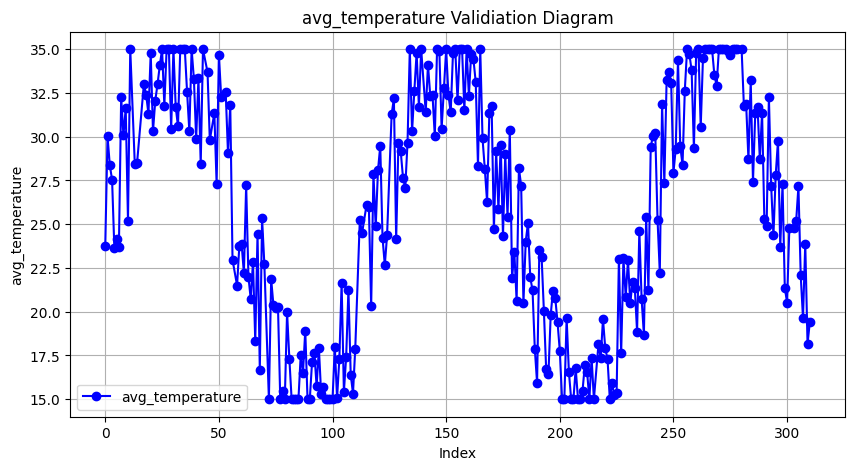

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['avg_temperature'], marker='o', linestyle='-', color='b', label='avg_temperature')

plt.xlabel('Index')
plt.ylabel('avg_temperature')
plt.title('avg_temperature Validiation Diagram')
plt.legend()
plt.grid(True)

plt.show()

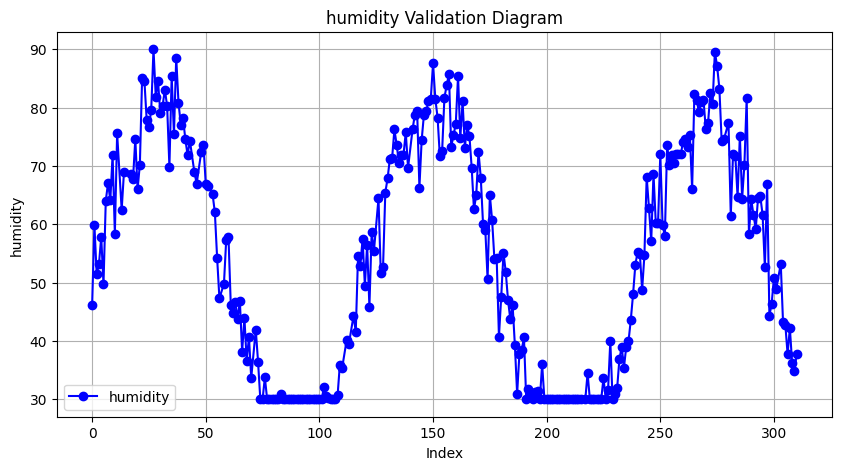

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['humidity'], marker='o', linestyle='-', color='b', label='humidity')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('humidity')
plt.title('humidity Validation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

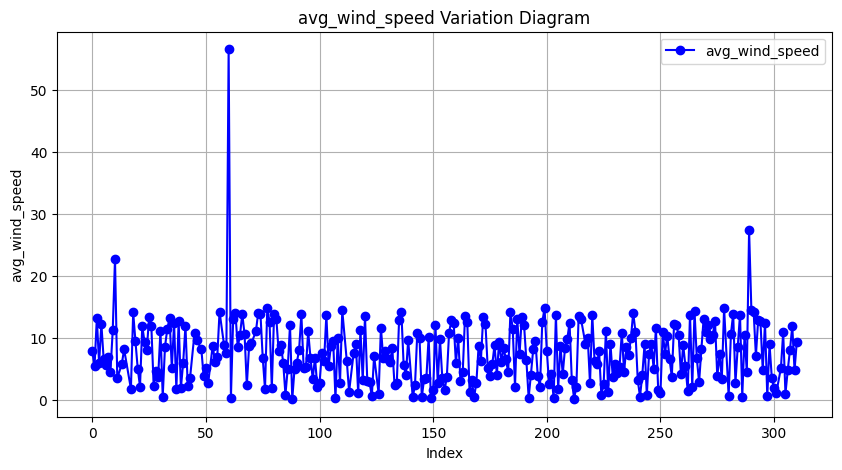

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['avg_wind_speed'], marker='o', linestyle='-', color='b', label='avg_wind_speed')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('avg_wind_speed')
plt.title('avg_wind_speed Variation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

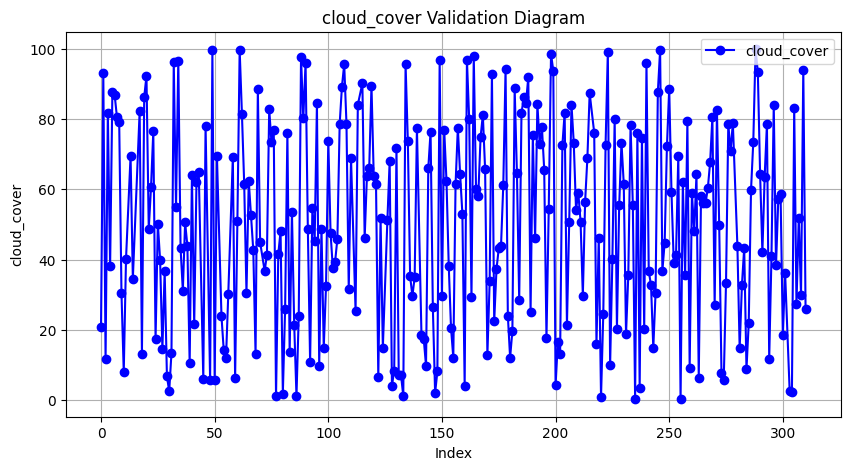

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['cloud_cover'], marker='o', linestyle='-', color='b', label='cloud_cover')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('cloud_cover')
plt.title('cloud_cover Validation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

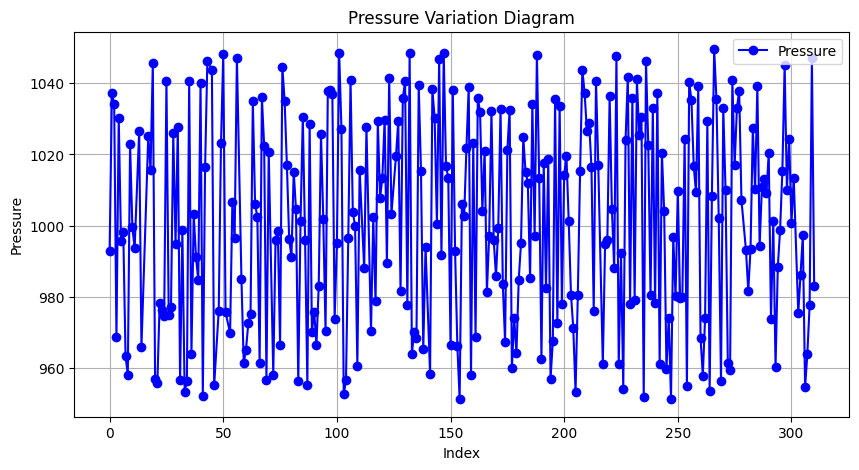

In [34]:

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['pressure'], marker='o', linestyle='-', color='b', label='Pressure')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Pressure')
plt.title('Pressure Variation Diagram')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [41]:
top_max_pressures = df['avg_wind_speed'].nlargest(1)
top_max_pressures

60    56.636041
Name: avg_wind_speed, dtype: float64

In [42]:

data = df['avg_wind_speed']
df = pd.DataFrame(data)

max_index = df['avg_wind_speed'].idxmax()

mean_wind_speed = df.loc[df.index != max_index, 'avg_wind_speed'].mean()

df.loc[max_index, 'avg_wind_speed'] = mean_wind_speed

print(df)

     avg_wind_speed
0          7.845981
1          5.382457
2         13.158008
3          5.886677
4         12.248992
..              ...
306        4.729355
307        8.092369
308       11.860847
309        4.781288
310        9.388371

[296 rows x 1 columns]


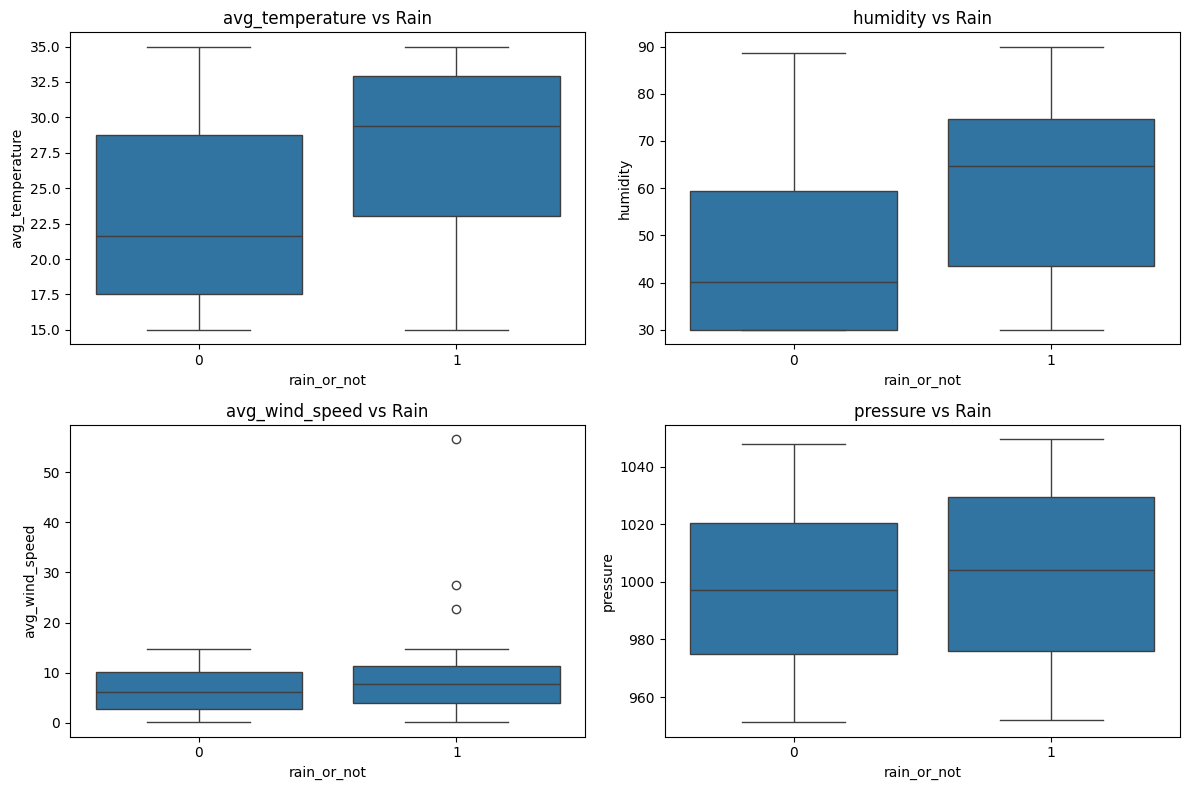

In [ ]:
features = ["avg_temperature", "humidity", "avg_wind_speed", "pressure"]
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["rain_or_not"], y=df[feature])
    plt.title(f"{feature} vs Rain")
    
plt.tight_layout()
plt.show()

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


ValueError: could not convert string to float: '2023-01-01'

In [36]:
df["date"] = pd.to_datetime(df["date"])  # Convert to datetime
df["month"] = df["date"].dt.month  # Extract month
df["day"] = df["date"].dt.day  # Extract day


C:\Users\Verosha Kriyanjala\AppData\Local\Temp\ipykernel_11676\1632025775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"])  # Convert to datetime
C:\Users\Verosha Kriyanjala\AppData\Local\Temp\ipykernel_11676\1632025775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["date"].dt.month  # Extract month
C:\Users\Verosha Kriyanjala\AppData\Local\Temp\ipykernel_11676\1632025775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

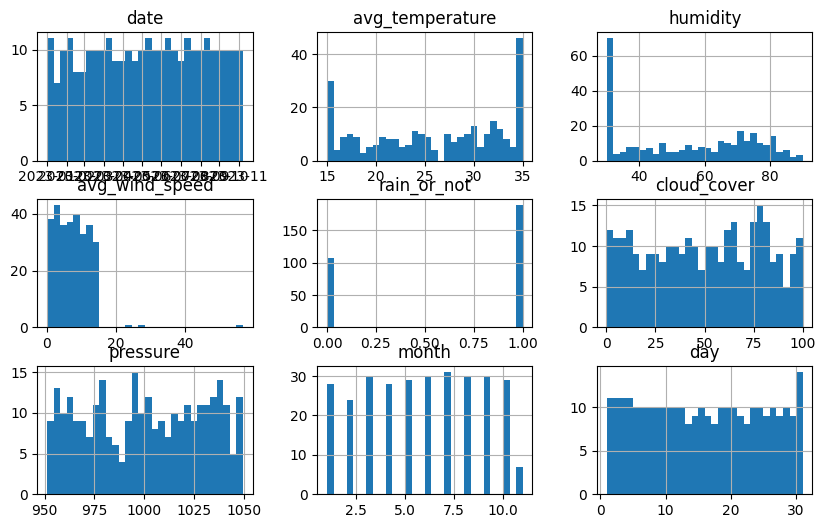

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
df.hist(figsize=(10, 6), bins=30)
plt.show()


6️⃣ Correlation Analysis

Find relationships between variables

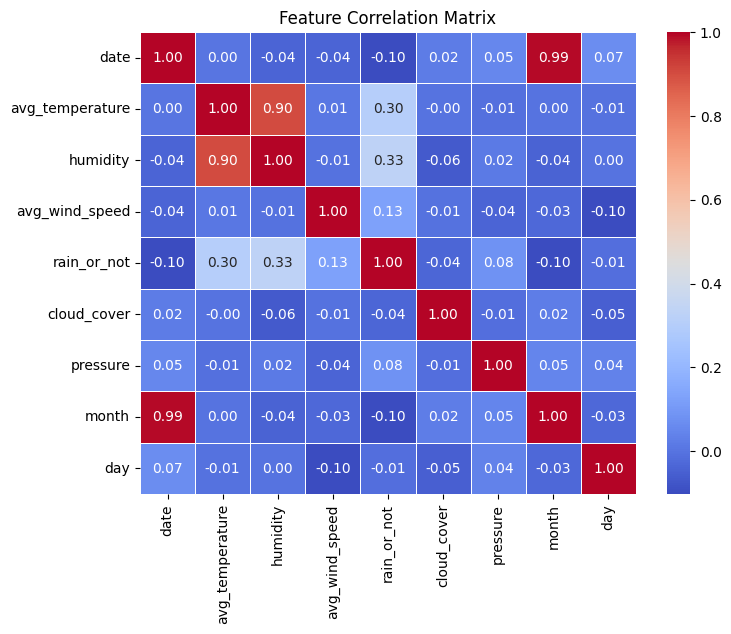

In [41]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


7️⃣ Rain Probability Over Time

Check seasonal trends in rain occurrences

In [5]:
# Group by month and calculate average rain probability
monthly_rain = df.groupby("month")["rain_or_not"].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_rain.index, y=monthly_rain.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Rain Probability")
plt.title("Rain Probability Across Months")
plt.grid()
plt.show()


NameError: name 'df' is not defined

8️⃣ Pairplot (Feature Relationships)
Pairwise relationships help in spotting patterns

In [4]:
sns.pairplot(df, hue="rain_or_not", diag_kind="kde")
plt.show()

NameError: name 'sns' is not defined

9️⃣ Feature Importance (Using Random Forest)

Check which features are most important for rain prediction

In [ ]:


# Define X and y
X = df.drop(columns=["rain_or_not", "date"])
y = df["rain_or_not"]

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind="barh", figsize=(8, 5), color="royalblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()


NameError: name 'df' is not defined

In [ ]:
y = df["rain_or_not"]  # Target variable
X = df.drop(columns=["rain_or_not"])